In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from functools import cmp_to_key
import pickle
import datetime
from scipy import ndimage
import math
import imageio

import sys

sys.path.append('/home/niaki/PycharmProjects/learned-sift/PythonSIFT')

from pysift import computeKeypointsAndDescriptors

In [13]:
sigma = 1.6
num_intervals = 3
assumed_blur = 0.5
image_border_width = 5
contrast_threshold = 0.04

In [14]:
image = cv2.imread('/home/kuca/Downloads/studgrad_bw_crop.jpg', 0)

In [17]:
keypoints, descriptors = computeKeypointsAndDescriptors(image, sigma=1.6, num_intervals=3, assumed_blur=0.5, image_border_width=5)

-1 1 2.0 792 3166 [  5 477] 0.022222222222222223 188.88333129882812 -0.125 6.675308704376221 24
-1 1 2.0 792 3166 [  6 660] 0.022222222222222223 358.86930203437805 -0.125 5.78567898273468 20
-1 1 2.0 792 3166 [  6 660] 0.022222222222222223 202.90573120117188 -0.125 5.78567898273468 20
-1 2 2.0 792 3166 [  6 513] 0.022222222222222223 43.985931396484375 -0.125 7.19638466835022 25
0 1 1.0 396 1583 [  5 300] 0.022222222222222223 359.021212041378 -0.125 5.561414837837219 20
-1 1 2.0 792 3166 [ 10 655] 0.022222222222222223 192.76673889160156 -0.125 6.547129154205322 23
-1 1 2.0 792 3166 [ 10 655] 0.022222222222222223 8.50079345703125 -0.125 6.547129154205322 23
-1 3 2.0 792 3166 [ 11 524] 0.022222222222222223 187.39450073242188 -0.125 9.500535249710083 34
-1 1 2.0 792 3166 [ 12 509] 0.022222222222222223 127.94725036621094 -0.125 6.506546258926392 23
-1 1 2.0 792 3166 [ 12 509] 0.022222222222222223 41.60357666015625 -0.125 6.506546258926392 23
0 1 1.0 396 1583 [  6 229] 0.022222222222222223 1

0 1 1.0 396 1583 [ 27 208] 0.022222222222222223 111.23527526855469 -0.125 5.765436172485352 20
0 2 1.0 396 1583 [ 27 320] 0.022222222222222223 269.8382339477539 -0.125 7.3521645069122314 26
0 2 1.0 396 1583 [ 27 320] 0.022222222222222223 192.50314331054688 -0.125 7.3521645069122314 26
0 2 1.0 396 1583 [ 27 320] 0.022222222222222223 5.28692626953125 -0.125 7.3521645069122314 26
-1 3 2.0 792 3166 [ 55 515] 0.022222222222222223 190.9909210205078 -0.125 9.369086980819702 33
-1 1 2.0 792 3166 [ 56 489] 0.022222222222222223 256.35572814941406 -0.125 6.132824420928955 22
-1 1 2.0 792 3166 [ 56 489] 0.022222222222222223 123.01687622070312 -0.125 6.132824420928955 22
0 2 1.0 396 1583 [ 28 199] 0.022222222222222223 3.9722900390625 -0.125 7.555474519729614 27
-1 2 2.0 792 3166 [ 58 542] 0.022222222222222223 109.08601379394531 -0.125 7.333706617355347 26
-1 3 2.0 792 3166 [ 59 557] 0.022222222222222223 188.19654846191406 -0.125 10.438522338867188 37
-1 3 2.0 792 3166 [ 59 557] 0.022222222222222223

0 1 1.0 396 1583 [ 56 213] 0.022222222222222223 275.7677917480469 -0.125 5.5685566663742065 20
0 3 1.0 396 1583 [ 56 173] 0.022222222222222223 107.12005615234375 -0.125 9.762601375579834 35
1 2 0.5 198 791 [ 28 142] 0.022222222222222223 330.33632469177246 -0.125 7.30867338180542 26
1 2 0.5 198 791 [ 28 142] 0.022222222222222223 114.05401611328125 -0.125 7.30867338180542 26
-1 3 2.0 792 3166 [113 666] 0.022222222222222223 137.99110412597656 -0.125 9.035116195678711 32
0 2 1.0 396 1583 [ 56 243] 0.022222222222222223 264.0792007446289 -0.125 7.556617498397827 27
0 2 1.0 396 1583 [ 58 272] 0.022222222222222223 290.06722259521484 -0.125 7.193004369735718 25
0 3 1.0 396 1583 [ 58 204] 0.022222222222222223 109.58061218261719 -0.125 10.23648476600647 36
-1 3 2.0 792 3166 [119 393] 0.022222222222222223 104.54425048828125 -0.125 9.479945182800293 34
1 1 0.5 198 791 [ 30 117] 0.022222222222222223 103.57235717773438 -0.125 5.701844215393066 20
0 3 1.0 396 1583 [ 60 186] 0.022222222222222223 357.31

-1 1 2.0 792 3166 [187 511] 0.022222222222222223 292.23177337646484 -0.125 6.2068397998809814 22
-1 1 2.0 792 3166 [187 340] 0.022222222222222223 116.05058288574219 -0.125 6.24641489982605 22
-1 1 2.0 792 3166 [187 357] 0.022222222222222223 194.5781707763672 -0.125 6.142658472061157 22
-1 2 2.0 792 3166 [187 400] 0.022222222222222223 186.8416290283203 -0.125 6.877481460571289 24
-1 3 2.0 792 3166 [190 414] 0.022222222222222223 193.13629150390625 -0.125 9.066277742385864 32
0 3 1.0 396 1583 [ 95 241] 0.022222222222222223 110.32722473144531 -0.125 9.097588062286377 32
-1 1 2.0 792 3166 [191 333] 0.022222222222222223 287.9025192260742 -0.125 5.694217085838318 20
0 3 1.0 396 1583 [ 95 174] 0.022222222222222223 196.50152587890625 -0.125 9.578666925430298 34
-1 1 2.0 792 3166 [191 332] 0.022222222222222223 287.83860778808594 -0.125 5.676004528999329 20
-1 1 2.0 792 3166 [192 613] 0.022222222222222223 21.250701904296875 -0.125 6.7611565589904785 24
-1 2 2.0 792 3166 [193 393] 0.02222222222222

-1 1 2.0 792 3166 [240 581] 0.022222222222222223 280.2334899902344 -0.125 5.558591365814209 20
0 2 1.0 396 1583 [120 303] 0.022222222222222223 291.3761444091797 -0.125 7.969950199127197 28
-1 1 2.0 792 3166 [241 338] 0.022222222222222223 288.7278823852539 -0.125 5.495975375175476 19
0 3 1.0 396 1583 [121 225] 0.022222222222222223 297.31787490844727 -0.125 8.83590817451477 31
-1 2 2.0 792 3166 [242 538] 0.022222222222222223 189.52508544921875 -0.125 6.914264917373657 24
0 2 1.0 396 1583 [121 373] 0.022222222222222223 149.5042266845703 -0.125 6.969675064086914 25
0 3 1.0 396 1583 [121 151] 0.022222222222222223 109.72113037109375 -0.125 9.213551759719849 33
0 1 1.0 396 1583 [122 273] 0.022222222222222223 323.8572235107422 -0.125 5.410278797149658 19
0 1 1.0 396 1583 [122 273] 0.022222222222222223 240.5109634399414 -0.125 5.410278797149658 19
-1 2 2.0 792 3166 [245 562] 0.022222222222222223 7.041473388671875 -0.125 8.481029033660889 30
-1 1 2.0 792 3166 [245 321] 0.022222222222222223 195.0

0 3 1.0 396 1583 [145 377] 0.022222222222222223 45.862274169921875 -0.125 8.790878534317017 31
0 3 1.0 396 1583 [145 193] 0.022222222222222223 309.70394134521484 -0.125 9.093383073806763 32
0 3 1.0 396 1583 [145 193] 0.022222222222222223 97.62384033203125 -0.125 9.093383073806763 32
-1 1 2.0 792 3166 [290 333] 0.022222222222222223 107.92196655273438 -0.125 6.121668577194214 22
-1 3 2.0 792 3166 [291 339] 0.022222222222222223 101.21157836914062 -0.125 9.399060487747192 33
0 2 1.0 396 1583 [146 252] 0.022222222222222223 105.98228454589844 -0.125 7.357744932174683 26
-1 2 2.0 792 3166 [292 447] 0.022222222222222223 108.89178466796875 -0.125 7.598849058151245 27
-1 3 2.0 792 3166 [293 559] 0.022222222222222223 291.02767181396484 -0.125 10.360708951950073 37
0 2 1.0 396 1583 [147 200] 0.022222222222222223 104.372314453125 -0.125 7.911355018615723 28
-1 1 2.0 792 3166 [294 337] 0.022222222222222223 103.1737060546875 -0.125 5.86890721321106 21
-1 1 2.0 792 3166 [294 542] 0.022222222222222223 

-1 1 2.0 792 3166 [331 265] 0.022222222222222223 109.58937072753906 -0.125 5.902224183082581 21
-1 1 2.0 792 3166 [332 643] 0.022222222222222223 317.9476318359375 -0.125 5.848547101020813 21
-1 3 2.0 792 3166 [332 554] 0.022222222222222223 206.34744262695312 -0.125 8.877116918563843 31
-1 3 2.0 792 3166 [332 554] 0.022222222222222223 119.90499877929688 -0.125 8.877116918563843 31
0 2 1.0 396 1583 [166 213] 0.022222222222222223 339.10016441345215 -0.125 8.477753162384033 30
0 2 1.0 396 1583 [166 213] 0.022222222222222223 118.19198608398438 -0.125 8.477753162384033 30
-1 2 2.0 792 3166 [333 296] 0.022222222222222223 10.255828857421875 -0.125 7.371919870376587 26
0 3 1.0 396 1583 [167 212] 0.022222222222222223 336.9278984069824 -0.125 9.448885917663574 33
0 3 1.0 396 1583 [167 212] 0.022222222222222223 121.57705688476562 -0.125 9.448885917663574 33
-1 2 2.0 792 3166 [334 505] 0.022222222222222223 160.83082580566406 -0.125 6.93746280670166 25
-1 3 2.0 792 3166 [335 589] 0.02222222222222222

-1 1 2.0 792 3166 [367 579] 0.022222222222222223 306.6288871765137 -0.125 6.402047395706177 23
0 1 1.0 396 1583 [184 280] 0.022222222222222223 355.3643002510071 -0.125 5.59752631187439 20
0 1 1.0 396 1583 [184 280] 0.022222222222222223 164.12693786621094 -0.125 5.59752631187439 20
-1 1 2.0 792 3166 [367 343] 0.022222222222222223 181.5072021484375 -0.125 5.926259279251099 21
-1 2 2.0 792 3166 [367 486] 0.022222222222222223 191.5269317626953 -0.125 6.95064640045166 25
-1 2 2.0 792 3166 [367 486] 0.022222222222222223 6.762481689453125 -0.125 6.95064640045166 25
-1 1 2.0 792 3166 [368 449] 0.022222222222222223 332.5163345336914 -0.125 6.267011404037476 22
-1 1 2.0 792 3166 [369 362] 0.022222222222222223 109.62165832519531 -0.125 6.774142026901245 24
-1 3 2.0 792 3166 [370 426] 0.022222222222222223 107.42153930664062 -0.125 10.149347305297852 36
0 1 1.0 396 1583 [185 369] 0.022222222222222223 56.58685302734375 -0.125 6.637925863265991 23
-1 3 2.0 792 3166 [370 439] 0.022222222222222223 326.

-1 3 2.0 792 3166 [400 527] 0.022222222222222223 105.19671630859375 -0.125 10.397705554962158 37
-1 3 2.0 792 3166 [400 527] 0.022222222222222223 1.923858642578125 -0.125 10.397705554962158 37
0 2 1.0 396 1583 [200 231] 0.022222222222222223 319.05698013305664 -0.125 6.974653244018555 25
-1 2 2.0 792 3166 [401 658] 0.022222222222222223 61.511444091796875 -0.125 8.42665958404541 30
-1 2 2.0 792 3166 [402 405] 0.022222222222222223 107.76495361328125 -0.125 7.675083160400391 27
-1 1 2.0 792 3166 [402 412] 0.022222222222222223 111.42025756835938 -0.125 6.160077095031738 22
-1 2 2.0 792 3166 [403 260] 0.022222222222222223 293.9664306640625 -0.125 7.700562000274658 27
-1 1 2.0 792 3166 [403 472] 0.022222222222222223 183.1115264892578 -0.125 6.2504353523254395 22
0 1 1.0 396 1583 [202 248] 0.022222222222222223 344.94126319885254 -0.125 5.662236213684082 20
0 1 1.0 396 1583 [202 279] 0.022222222222222223 335.8366947174072 -0.125 6.062752962112427 21
-1 1 2.0 792 3166 [405 490] 0.022222222222222

-1 1 2.0 792 3166 [438 312] 0.022222222222222223 318.7020454406738 -0.125 6.679450035095215 24
-1 1 2.0 792 3166 [438 458] 0.022222222222222223 179.09268188476562 -0.125 5.86150324344635 21
0 2 1.0 396 1583 [219 342] 0.022222222222222223 57.899993896484375 -0.125 7.91669225692749 28
0 2 1.0 396 1583 [219 342] 0.022222222222222223 41.950469970703125 -0.125 7.91669225692749 28
-1 1 2.0 792 3166 [439 319] 0.022222222222222223 128.07870483398438 -0.125 5.831942439079285 21
1 3 0.5 198 791 [110 191] 0.022222222222222223 235.93628692626953 -0.125 10.295275211334229 36
-1 1 2.0 792 3166 [439 254] 0.022222222222222223 169.4122314453125 -0.125 6.548467397689819 23
-1 1 2.0 792 3166 [439 254] 0.022222222222222223 128.50967407226562 -0.125 6.548467397689819 23
-1 2 2.0 792 3166 [439 471] 0.022222222222222223 179.4440155029297 -0.125 8.141397714614868 29
-1 2 2.0 792 3166 [439 471] 0.022222222222222223 15.87841796875 -0.125 8.141397714614868 29
-1 2 2.0 792 3166 [439 265] 0.022222222222222223 283.

-1 2 2.0 792 3166 [473 353] 0.022222222222222223 148.53416442871094 -0.125 7.611702919006348 27
-1 2 2.0 792 3166 [473 353] 0.022222222222222223 12.254913330078125 -0.125 7.611702919006348 27
-1 1 2.0 792 3166 [474 508] 0.022222222222222223 137.60421752929688 -0.125 6.011687994003296 21
-1 2 2.0 792 3166 [475 365] 0.022222222222222223 192.4444580078125 -0.125 7.770619869232178 27
-1 1 2.0 792 3166 [476 379] 0.022222222222222223 107.46142578125 -0.125 6.385522127151489 23
-1 2 2.0 792 3166 [477 386] 0.022222222222222223 198.19735717773438 -0.125 8.340979099273682 29
-1 1 2.0 792 3166 [477  48] 0.022222222222222223 106.66424560546875 -0.125 6.1423845291137695 22
0 2 1.0 396 1583 [239 267] 0.022222222222222223 63.70135498046875 -0.125 8.133951187133789 29
0 2 1.0 396 1583 [239 267] 0.022222222222222223 33.851318359375 -0.125 8.133951187133789 29
-1 3 2.0 792 3166 [478 432] 0.022222222222222223 129.6446075439453 -0.125 8.719563961029053 31
-1 2 2.0 792 3166 [478 400] 0.022222222222222223 1

-1 2 2.0 792 3166 [514 443] 0.022222222222222223 320.5603256225586 -0.125 8.486459970474243 30
-1 3 2.0 792 3166 [514 427] 0.022222222222222223 345.9525604248047 -0.125 10.149874448776245 36
-1 3 2.0 792 3166 [514 427] 0.022222222222222223 136.50717163085938 -0.125 10.149874448776245 36
-1 3 2.0 792 3166 [514 427] 0.022222222222222223 95.24819946289062 -0.125 10.149874448776245 36
-1 3 2.0 792 3166 [514 652] 0.022222222222222223 63.622039794921875 -0.125 8.693894863128662 31
0 2 1.0 396 1583 [257 332] 0.022222222222222223 15.07061767578125 -0.125 7.129538297653198 25
-1 3 2.0 792 3166 [515 259] 0.022222222222222223 110.05436706542969 -0.125 9.13254690170288 32
0 1 1.0 396 1583 [258 258] 0.022222222222222223 224.7987518310547 -0.125 5.997557759284973 21
-1 1 2.0 792 3166 [515 240] 0.022222222222222223 140.08233642578125 -0.125 5.967274904251099 21
-1 3 2.0 792 3166 [516 274] 0.022222222222222223 198.22450256347656 -0.125 8.952251672744751 32
-1 2 2.0 792 3166 [517 288] 0.022222222222222

-1 1 2.0 792 3166 [549 416] 0.022222222222222223 318.55107498168945 -0.125 6.3052918910980225 22
1 3 0.5 198 791 [137  81] 0.022222222222222223 131.3466033935547 -0.125 9.193794250488281 33
0 2 1.0 396 1583 [275 249] 0.022222222222222223 60.82281494140625 -0.125 7.5706586837768555 27
0 2 1.0 396 1583 [275 174] 0.022222222222222223 317.23499298095703 -0.125 6.805980920791626 24
0 1 1.0 396 1583 [276 109] 0.022222222222222223 186.82066345214844 -0.125 6.042521238327026 21
-1 2 2.0 792 3166 [552 364] 0.022222222222222223 350.700834274292 -0.125 8.469725847244263 30
-1 2 2.0 792 3166 [552 364] 0.022222222222222223 178.5273895263672 -0.125 8.469725847244263 30
0 3 1.0 396 1583 [276 117] 0.022222222222222223 92.48458862304688 -0.125 8.88043999671936 31
-1 2 2.0 792 3166 [553 294] 0.022222222222222223 107.16413879394531 -0.125 7.226650714874268 26
-1 3 2.0 792 3166 [553 302] 0.022222222222222223 109.17427062988281 -0.125 9.620866298675537 34
-1 1 2.0 792 3166 [553 607] 0.022222222222222223 18

0 1 1.0 396 1583 [291 225] 0.022222222222222223 67.57138061523438 -0.125 6.022846698760986 21
0 1 1.0 396 1583 [291 225] 0.022222222222222223 44.268218994140625 -0.125 6.022846698760986 21
-1 2 2.0 792 3166 [582 380] 0.022222222222222223 318.90621185302734 -0.125 8.402554035186768 30
-1 1 2.0 792 3166 [583 218] 0.022222222222222223 300.02430725097656 -0.125 5.563923954963684 20
0 2 1.0 396 1583 [292 167] 0.022222222222222223 308.36546325683594 -0.125 7.75872015953064 27
0 2 1.0 396 1583 [292 167] 0.022222222222222223 256.2720413208008 -0.125 7.75872015953064 27
0 2 1.0 396 1583 [292 167] 0.022222222222222223 118.4642333984375 -0.125 7.75872015953064 27
-1 1 2.0 792 3166 [583 232] 0.022222222222222223 134.86427307128906 -0.125 6.102083444595337 22
-1 3 2.0 792 3166 [584 254] 0.022222222222222223 191.34181213378906 -0.125 9.800255298614502 35
-1 3 2.0 792 3166 [584 254] 0.022222222222222223 6.906402587890625 -0.125 9.800255298614502 35
-1 1 2.0 792 3166 [584 346] 0.022222222222222223 8.4

-1 1 2.0 792 3166 [618 233] 0.022222222222222223 191.82774353027344 -0.125 6.493705987930298 23
-1 1 2.0 792 3166 [618 169] 0.022222222222222223 0.444793701171875 -0.125 6.545715808868408 23
-1 1 2.0 792 3166 [618 175] 0.022222222222222223 0.7816162109375 -0.125 5.992496967315674 21
-1 2 2.0 792 3166 [619 597] 0.022222222222222223 270.3094482421875 -0.125 7.5595550537109375 27
0 1 1.0 396 1583 [310 169] 0.022222222222222223 337.14845275878906 -0.125 5.575965642929077 20
-1 2 2.0 792 3166 [621 320] 0.022222222222222223 238.9790802001953 -0.125 8.090736150741577 29
-1 2 2.0 792 3166 [621 320] 0.022222222222222223 109.05068969726562 -0.125 8.090736150741577 29
-1 2 2.0 792 3166 [621 255] 0.022222222222222223 192.33741760253906 -0.125 7.084975719451904 25
-1 2 2.0 792 3166 [621 268] 0.022222222222222223 112.6563720703125 -0.125 7.419401407241821 26
-1 2 2.0 792 3166 [622 276] 0.022222222222222223 197.55111694335938 -0.125 7.904862642288208 28
-1 2 2.0 792 3166 [622 276] 0.02222222222222222

0 1 1.0 396 1583 [329 163] 0.022222222222222223 67.70263671875 -0.125 6.132511138916016 22
-1 2 2.0 792 3166 [659 235] 0.022222222222222223 181.41197204589844 -0.125 8.468220233917236 30
-1 2 2.0 792 3166 [659 235] 0.022222222222222223 8.670501708984375 -0.125 8.468220233917236 30
-1 1 2.0 792 3166 [659  85] 0.022222222222222223 138.1280059814453 -0.125 6.025580406188965 21
-1 1 2.0 792 3166 [660 310] 0.022222222222222223 217.95306396484375 -0.125 6.150657892227173 22
0 3 1.0 396 1583 [330  69] 0.022222222222222223 112.82838439941406 -0.125 10.501344680786133 37
1 1 0.5 198 791 [165  34] 0.022222222222222223 112.70826721191406 -0.125 5.506107330322266 19
-1 3 2.0 792 3166 [661 187] 0.022222222222222223 0.00213623046875 -0.125 9.269354581832886 33
-1 1 2.0 792 3166 [661 150] 0.022222222222222223 130.64173889160156 -0.125 6.3793816566467285 23
0 1 1.0 396 1583 [330 251] 0.022222222222222223 68.80853271484375 -0.125 6.129725217819214 22
-1 1 2.0 792 3166 [661 263] 0.022222222222222223 197

-1 1 2.0 792 3166 [696 241] 0.022222222222222223 108.26165771484375 -0.125 6.580129623413086 23
-1 2 2.0 792 3166 [697 359] 0.022222222222222223 62.39251708984375 -0.125 8.055174350738525 28
-1 3 2.0 792 3166 [697 208] 0.022222222222222223 4.54443359375 -0.125 9.547507524490356 34
-1 1 2.0 792 3166 [698 443] 0.022222222222222223 357.9403142929077 -0.125 5.534771203994751 20
2 1 0.25 99 395 [87 78] 0.022222222222222223 155.08729553222656 -0.125 6.579219818115234 23
-1 2 2.0 792 3166 [699 449] 0.022222222222222223 193.41110229492188 -0.125 7.237515449523926 26
-1 2 2.0 792 3166 [700 141] 0.022222222222222223 208.43150329589844 -0.125 7.334182262420654 26
0 2 1.0 396 1583 [350 294] 0.022222222222222223 140.76463317871094 -0.125 7.2692155838012695 26
1 3 0.5 198 791 [175  74] 0.022222222222222223 49.160003662109375 -0.125 9.574666500091553 34
-1 1 2.0 792 3166 [701 598] 0.022222222222222223 273.22042083740234 -0.125 6.747977256774902 24
-1 1 2.0 792 3166 [701 598] 0.022222222222222223 119.

-1 1 2.0 792 3166 [748 546] 0.022222222222222223 9.641845703125 -0.125 6.133523941040039 22
1 3 0.5 198 791 [187 101] 0.022222222222222223 240.73297119140625 -0.125 9.485824584960938 34
1 3 0.5 198 791 [187 101] 0.022222222222222223 49.50982666015625 -0.125 9.485824584960938 34
0 3 1.0 396 1583 [374 263] 0.022222222222222223 162.58151245117188 -0.125 10.333456993103027 37
0 3 1.0 396 1583 [374 263] 0.022222222222222223 112.79808044433594 -0.125 10.333456993103027 37
-1 2 2.0 792 3166 [751 208] 0.022222222222222223 134.04183959960938 -0.125 7.116095781326294 25
-1 2 2.0 792 3166 [753 394] 0.022222222222222223 65.9058837890625 -0.125 6.894721269607544 24
0 2 1.0 396 1583 [377  81] 0.022222222222222223 338.0477809906006 -0.125 7.792111873626709 28
0 3 1.0 396 1583 [377 275] 0.022222222222222223 288.89300537109375 -0.125 9.702753782272339 34
0 3 1.0 396 1583 [377 275] 0.022222222222222223 15.73162841796875 -0.125 9.702753782272339 34
-1 3 2.0 792 3166 [754  98] 0.022222222222222223 113.958

0 1 1.0 396 1583 [401 173] 0.022222222222222223 13.95269775390625 -0.125 5.462772846221924 19
-1 2 2.0 792 3166 [803 148] 0.022222222222222223 109.49563598632812 -0.125 7.360535144805908 26
-1 2 2.0 792 3166 [803 772] 0.022222222222222223 113.27638244628906 -0.125 8.021559476852417 28
-1 1 2.0 792 3166 [803 339] 0.022222222222222223 66.94708251953125 -0.125 6.275821924209595 22
0 2 1.0 396 1583 [402 187] 0.022222222222222223 236.52735900878906 -0.125 7.263099431991577 26
-1 2 2.0 792 3166 [804 278] 0.022222222222222223 189.96104431152344 -0.125 6.930764436721802 25
-1 2 2.0 792 3166 [804 466] 0.022222222222222223 323.0414581298828 -0.125 8.191672325134277 29
-1 2 2.0 792 3166 [804 466] 0.022222222222222223 183.58099365234375 -0.125 8.191672325134277 29
-1 2 2.0 792 3166 [805 116] 0.022222222222222223 290.8776092529297 -0.125 7.166351795196533 25
-1 3 2.0 792 3166 [805 157] 0.022222222222222223 110.92304992675781 -0.125 10.193193197250366 36
-1 1 2.0 792 3166 [806 496] 0.022222222222222

-1 1 2.0 792 3166 [841 519] 0.022222222222222223 190.12940979003906 -0.125 5.891615509986877 21
-1 3 2.0 792 3166 [841  96] 0.022222222222222223 5.58251953125 -0.125 8.885005474090576 31
-1 3 2.0 792 3166 [842 119] 0.022222222222222223 354.1245746612549 -0.125 9.430808544158936 33
-1 3 2.0 792 3166 [842 119] 0.022222222222222223 178.18421936035156 -0.125 9.430808544158936 33
-1 2 2.0 792 3166 [842 334] 0.022222222222222223 350.2841987609863 -0.125 7.16346287727356 25
-1 1 2.0 792 3166 [843 487] 0.022222222222222223 108.78218078613281 -0.125 5.5379791259765625 20
-1 1 2.0 792 3166 [843 752] 0.022222222222222223 113.811279296875 -0.125 5.77705192565918 20
-1 1 2.0 792 3166 [846 503] 0.022222222222222223 180.34304809570312 -0.125 6.588238477706909 23
2 1 0.25 99 395 [106  13] 0.022222222222222223 103.73687744140625 -0.125 5.971240282058716 21
0 1 1.0 396 1583 [423  66] 0.022222222222222223 297.73954010009766 -0.125 5.597019195556641 20
-1 2 2.0 792 3166 [847 520] 0.022222222222222223 191.

-1 2 2.0 792 3166 [890 507] 0.022222222222222223 190.47206115722656 -0.125 7.421926975250244 26
-1 3 2.0 792 3166 [893 446] 0.022222222222222223 295.4901809692383 -0.125 9.998080730438232 35
-1 3 2.0 792 3166 [893 446] 0.022222222222222223 178.78463745117188 -0.125 9.998080730438232 35
-1 3 2.0 792 3166 [893 446] 0.022222222222222223 3.14996337890625 -0.125 9.998080730438232 35
1 3 0.5 198 791 [224  47] 0.022222222222222223 260.59009552001953 -0.125 10.15777587890625 36
-1 2 2.0 792 3166 [896 115] 0.022222222222222223 111.39117431640625 -0.125 8.22463059425354 29
-1 2 2.0 792 3166 [897 180] 0.022222222222222223 355.43008041381836 -0.125 6.88657021522522 24
-1 2 2.0 792 3166 [897 180] 0.022222222222222223 192.52835083007812 -0.125 6.88657021522522 24
-1 2 2.0 792 3166 [898 104] 0.022222222222222223 194.00723266601562 -0.125 7.269842863082886 26
-1 2 2.0 792 3166 [898 728] 0.022222222222222223 118.39949035644531 -0.125 7.439982175827026 26
-1 1 2.0 792 3166 [899 121] 0.022222222222222223

0 2 1.0 396 1583 [476 246] 0.022222222222222223 300.50662994384766 -0.125 7.099056243896484 25
-1 3 2.0 792 3166 [952  30] 0.022222222222222223 307.7604103088379 -0.125 9.867502927780151 35
-1 3 2.0 792 3166 [952 161] 0.022222222222222223 262.9268341064453 -0.125 10.337056159973145 37
-1 3 2.0 792 3166 [952 161] 0.022222222222222223 193.61180114746094 -0.125 10.337056159973145 37
-1 1 2.0 792 3166 [953 128] 0.022222222222222223 65.81405639648438 -0.125 5.988867402076721 21
1 3 0.5 198 791 [238 116] 0.022222222222222223 1.4722900390625 -0.125 9.171374559402466 32
-1 1 2.0 792 3166 [953 100] 0.022222222222222223 111.32208251953125 -0.125 6.229959726333618 22
-1 3 2.0 792 3166 [953 435] 0.022222222222222223 109.25444030761719 -0.125 9.450410842895508 33
-1 2 2.0 792 3166 [954  66] 0.022222222222222223 2.405242919921875 -0.125 8.386166095733643 30
-1 3 2.0 792 3166 [954 206] 0.022222222222222223 69.701171875 -0.125 9.315617322921753 33
-1 3 2.0 792 3166 [955  83] 0.022222222222222223 324.4

-1 3 2.0 792 3166 [1026   60] 0.022222222222222223 260.3226547241211 -0.125 9.9637291431427 35
-1 3 2.0 792 3166 [1026   60] 0.022222222222222223 213.0074920654297 -0.125 9.9637291431427 35
-1 3 2.0 792 3166 [1028  102] 0.022222222222222223 69.37924194335938 -0.125 9.33068060874939 33
-1 2 2.0 792 3166 [1030   95] 0.022222222222222223 68.815185546875 -0.125 7.669513463973999 27
-1 2 2.0 792 3166 [1031    8] 0.022222222222222223 136.29168701171875 -0.125 7.870838642120361 28
0 1 1.0 396 1583 [516  83] 0.022222222222222223 75.72244262695312 -0.125 5.987901449203491 21
-1 3 2.0 792 3166 [1033  177] 0.022222222222222223 71.23858642578125 -0.125 9.651684522628784 34
-1 1 2.0 792 3166 [1033  666] 0.022222222222222223 115.99961853027344 -0.125 6.428082704544067 23
-1 1 2.0 792 3166 [1034   40] 0.022222222222222223 186.6337127685547 -0.125 5.918853521347046 21
-1 3 2.0 792 3166 [1034  206] 0.022222222222222223 257.06495666503906 -0.125 9.218173027038574 33
-1 2 2.0 792 3166 [1036  229] 0.02222

0 1 1.0 396 1583 [545 222] 0.022222222222222223 104.78323364257812 -0.125 5.897298216819763 21
-1 1 2.0 792 3166 [1091   58] 0.022222222222222223 72.20404052734375 -0.125 5.497581124305725 19
-1 1 2.0 792 3166 [1091  414] 0.022222222222222223 351.330060005188 -0.125 5.581693410873413 20
0 1 1.0 396 1583 [546 188] 0.022222222222222223 115.13815307617188 -0.125 6.175842046737671 22
-1 1 2.0 792 3166 [1091  421] 0.022222222222222223 355.363224029541 -0.125 6.064114093780518 21
-1 3 2.0 792 3166 [1092  135] 0.022222222222222223 76.76455688476562 -0.125 9.516006231307983 34
-1 2 2.0 792 3166 [1093  639] 0.022222222222222223 117.0902099609375 -0.125 7.287262916564941 26
0 1 1.0 396 1583 [547  82] 0.022222222222222223 259.1211166381836 -0.125 5.730862140655518 20
-1 1 2.0 792 3166 [1096  383] 0.022222222222222223 117.46917724609375 -0.125 5.87812864780426 21
-1 1 2.0 792 3166 [1096  174] 0.022222222222222223 269.69773864746094 -0.125 5.4449543952941895 19
-1 1 2.0 792 3166 [1097  356] 0.02222

1 3 0.5 198 791 [293  12] 0.022222222222222223 245.5825424194336 -0.125 9.484547853469849 34
1 3 0.5 198 791 [293  12] 0.022222222222222223 59.182708740234375 -0.125 9.484547853469849 34
-1 2 2.0 792 3166 [1173  260] 0.022222222222222223 270.02916717529297 -0.125 8.082148790359497 29
-1 2 2.0 792 3166 [1174  445] 0.022222222222222223 355.79993867874146 -0.125 8.016106367111206 28
-1 2 2.0 792 3166 [1177   29] 0.022222222222222223 77.72183227539062 -0.125 8.478532791137695 30
-1 3 2.0 792 3166 [1178   38] 0.022222222222222223 77.77304077148438 -0.125 9.377707242965698 33
-1 1 2.0 792 3166 [1179  330] 0.022222222222222223 186.08224487304688 -0.125 5.971183776855469 21
-1 3 2.0 792 3166 [1180  293] 0.022222222222222223 111.69488525390625 -0.125 9.662123680114746 34
1 2 0.5 198 791 [295  99] 0.022222222222222223 275.3723373413086 -0.125 7.156692266464233 25
-1 1 2.0 792 3166 [1182  593] 0.022222222222222223 116.75996398925781 -0.125 6.65273380279541 24
-1 1 2.0 792 3166 [1182  301] 0.02222

1 3 0.5 198 791 [322  65] 0.022222222222222223 106.20001220703125 -0.125 9.437870979309082 33
-1 3 2.0 792 3166 [1287  351] 0.022222222222222223 109.71769714355469 -0.125 9.00635576248169 32
-1 1 2.0 792 3166 [1288  551] 0.022222222222222223 114.55183410644531 -0.125 6.785475254058838 24
-1 2 2.0 792 3166 [1289  723] 0.022222222222222223 120.15031433105469 -0.125 7.4854066371917725 26
0 2 1.0 396 1583 [644 147] 0.022222222222222223 105.15354919433594 -0.125 6.8740739822387695 24
1 3 0.5 198 791 [323  94] 0.022222222222222223 355.3993835449219 -0.125 9.128942728042603 32
-1 1 2.0 792 3166 [1292  232] 0.022222222222222223 109.61393737792969 -0.125 6.406270265579224 23
1 2 0.5 198 791 [323  79] 0.022222222222222223 1.014617919921875 -0.125 7.762055397033691 27
-1 1 2.0 792 3166 [1295  354] 0.022222222222222223 111.7772216796875 -0.125 6.4972944259643555 23
0 1 1.0 396 1583 [648 173] 0.022222222222222223 281.53235626220703 -0.125 5.57133936882019 20
-1 2 2.0 792 3166 [1296  292] 0.02222222

-1 2 2.0 792 3166 [1386  676] 0.022222222222222223 127.45564270019531 -0.125 7.530571460723877 27
0 1 1.0 396 1583 [693  70] 0.022222222222222223 108.34062194824219 -0.125 6.313405752182007 22
-1 2 2.0 792 3166 [1387   84] 0.022222222222222223 293.75315856933594 -0.125 7.433628559112549 26
-1 2 2.0 792 3166 [1388  506] 0.022222222222222223 114.93745422363281 -0.125 8.11795163154602 29
-1 3 2.0 792 3166 [1388   74] 0.022222222222222223 300.65980529785156 -0.125 9.863908052444458 35
1 1 0.5 198 791 [347  31] 0.022222222222222223 136.37539672851562 -0.125 6.766862869262695 24
1 1 0.5 198 791 [347  31] 0.022222222222222223 113.53623962402344 -0.125 6.766862869262695 24
-1 1 2.0 792 3166 [1389  549] 0.022222222222222223 181.37637329101562 -0.125 6.291842937469482 22
-1 1 2.0 792 3166 [1389  549] 0.022222222222222223 0.758758544921875 -0.125 6.291842937469482 22
1 2 0.5 198 791 [348   7] 0.022222222222222223 343.6336097717285 -0.125 7.214506387710571 26
1 2 0.5 198 791 [348   7] 0.0222222222

1 1 0.5 198 791 [366  19] 0.022222222222222223 71.44827270507812 -0.125 6.677263498306274 24
-1 2 2.0 792 3166 [1463   75] 0.022222222222222223 338.388090133667 -0.125 7.063196897506714 25
1 2 0.5 198 791 [366   7] 0.022222222222222223 308.3098831176758 -0.125 8.013879776000977 28
0 1 1.0 396 1583 [733   8] 0.022222222222222223 103.26016235351562 -0.125 6.228047132492065 22
-1 2 2.0 792 3166 [1465  526] 0.022222222222222223 359.82139970362186 -0.125 8.359398365020752 30
-1 2 2.0 792 3166 [1465  526] 0.022222222222222223 182.29978942871094 -0.125 8.359398365020752 30
-1 2 2.0 792 3166 [1468  784] 0.022222222222222223 241.69232940673828 -0.125 7.55633282661438 27
-1 2 2.0 792 3166 [1469  107] 0.022222222222222223 111.31552124023438 -0.125 8.177701950073242 29
-1 2 2.0 792 3166 [1470  467] 0.022222222222222223 122.15254211425781 -0.125 7.101259231567383 25
0 2 1.0 396 1583 [735  26] 0.022222222222222223 298.1195831298828 -0.125 8.123872518539429 29
-1 1 2.0 792 3166 [1471  511] 0.02222222

0 2 1.0 396 1583 [766  55] 0.022222222222222223 289.6830520629883 -0.125 7.05428409576416 25
0 1 1.0 396 1583 [766   8] 0.022222222222222223 316.96221923828125 -0.125 5.880381345748901 21
-1 2 2.0 792 3166 [1532   65] 0.022222222222222223 288.66944122314453 -0.125 7.960114002227783 28
-1 2 2.0 792 3166 [1532   82] 0.022222222222222223 112.44181823730469 -0.125 7.559537887573242 27
-1 2 2.0 792 3166 [1533  561] 0.022222222222222223 179.44711303710938 -0.125 7.823184013366699 28
-1 2 2.0 792 3166 [1533  604] 0.022222222222222223 341.76573753356934 -0.125 7.024479389190674 25
-1 2 2.0 792 3166 [1533  604] 0.022222222222222223 118.36895751953125 -0.125 7.024479389190674 25
-1 3 2.0 792 3166 [1534  119] 0.022222222222222223 290.2340850830078 -0.125 9.21896767616272 33
-1 2 2.0 792 3166 [1537   42] 0.022222222222222223 159.73382568359375 -0.125 7.01775598526001 25
-1 2 2.0 792 3166 [1537  436] 0.022222222222222223 120.1605224609375 -0.125 7.096982717514038 25
-1 1 2.0 792 3166 [1538  724] 0.

-1 2 2.0 792 3166 [1610  456] 0.022222222222222223 11.930511474609375 -0.125 7.184596538543701 25
-1 1 2.0 792 3166 [1611  566] 0.022222222222222223 123.86784362792969 -0.125 6.036535978317261 21
-1 1 2.0 792 3166 [1611   49] 0.022222222222222223 105.97491455078125 -0.125 5.774609684944153 20
-1 2 2.0 792 3166 [1612  786] 0.022222222222222223 119.33346557617188 -0.125 7.428269147872925 26
0 1 1.0 396 1583 [807 378] 0.022222222222222223 14.707305908203125 -0.125 5.772469997406006 20
-1 2 2.0 792 3166 [1616  399] 0.022222222222222223 119.24763488769531 -0.125 7.153315544128418 25
-1 2 2.0 792 3166 [1616   28] 0.022222222222222223 189.62335205078125 -0.125 6.958117246627808 25
-1 1 2.0 792 3166 [1616  738] 0.022222222222222223 113.55068969726562 -0.125 6.680716037750244 24
-1 2 2.0 792 3166 [1616  455] 0.022222222222222223 171.2597198486328 -0.125 6.920198678970337 24
-1 2 2.0 792 3166 [1616  455] 0.022222222222222223 1.911895751953125 -0.125 6.920198678970337 24
-1 1 2.0 792 3166 [1617  

-1 1 2.0 792 3166 [1660  381] 0.022222222222222223 181.62156677246094 -0.125 6.149848222732544 22
2 1 0.25 99 395 [208  11] 0.022222222222222223 281.74735260009766 -0.125 6.207563638687134 22
-1 3 2.0 792 3166 [1662   21] 0.022222222222222223 109.38446044921875 -0.125 8.565208911895752 30
-1 2 2.0 792 3166 [1663  370] 0.022222222222222223 116.78553771972656 -0.125 7.257762908935547 26
-1 1 2.0 792 3166 [1666  376] 0.022222222222222223 359.81084057688713 -0.125 6.577575445175171 23
-1 1 2.0 792 3166 [1666  376] 0.022222222222222223 118.42117309570312 -0.125 6.577575445175171 23
-1 1 2.0 792 3166 [1666  393] 0.022222222222222223 359.9575468376279 -0.125 6.6762049198150635 24
-1 1 2.0 792 3166 [1666  393] 0.022222222222222223 180.77911376953125 -0.125 6.6762049198150635 24
-1 2 2.0 792 3166 [1666  533] 0.022222222222222223 344.07197856903076 -0.125 7.364644289016724 26
-1 1 2.0 792 3166 [1666  386] 0.022222222222222223 359.6648217141628 -0.125 6.255281925201416 22
-1 1 2.0 792 3166 [1666 

-1 1 2.0 792 3166 [1718   93] 0.022222222222222223 268.9455032348633 -0.125 6.462823390960693 23
2 2 0.25 99 395 [215  82] 0.022222222222222223 172.56683349609375 -0.125 7.155642986297607 25
2 2 0.25 99 395 [215  82] 0.022222222222222223 13.0274658203125 -0.125 7.155642986297607 25
-1 2 2.0 792 3166 [1721   48] 0.022222222222222223 103.71755981445312 -0.125 7.316755056381226 26
-1 2 2.0 792 3166 [1721   48] 0.022222222222222223 66.10488891601562 -0.125 7.316755056381226 26
1 3 0.5 198 791 [431  10] 0.022222222222222223 162.11636352539062 -0.125 9.393841981887817 33
-1 1 2.0 792 3166 [1725  359] 0.022222222222222223 356.6479105949402 -0.125 6.2835938930511475 22
-1 2 2.0 792 3166 [1725  370] 0.022222222222222223 359.3839073777199 -0.125 7.337498903274536 26
-1 2 2.0 792 3166 [1728  335] 0.022222222222222223 189.0091094970703 -0.125 8.149475812911987 29
1 1 0.5 198 791 [432  69] 0.022222222222222223 106.07411193847656 -0.125 6.203897953033447 22
-1 1 2.0 792 3166 [1730  507] 0.0222222222

-1 2 2.0 792 3166 [1795   16] 0.022222222222222223 265.2297592163086 -0.125 7.7162861824035645 27
-1 2 2.0 792 3166 [1795  554] 0.022222222222222223 200.1028594970703 -0.125 7.042828559875488 25
-1 2 2.0 792 3166 [1795  554] 0.022222222222222223 54.76043701171875 -0.125 7.042828559875488 25
-1 2 2.0 792 3166 [1796  530] 0.022222222222222223 179.61276245117188 -0.125 7.774247646331787 27
-1 2 2.0 792 3166 [1796  530] 0.022222222222222223 0.68353271484375 -0.125 7.774247646331787 27
-1 2 2.0 792 3166 [1797  396] 0.022222222222222223 352.4666361808777 -0.125 7.218228578567505 26
-1 1 2.0 792 3166 [1800  769] 0.022222222222222223 62.422882080078125 -0.125 5.634984612464905 20
-1 1 2.0 792 3166 [1802  555] 0.022222222222222223 195.88491821289062 -0.125 5.668169617652893 20
-1 1 2.0 792 3166 [1802  547] 0.022222222222222223 354.4542326927185 -0.125 6.2994303703308105 22
-1 1 2.0 792 3166 [1802  547] 0.022222222222222223 185.27337646484375 -0.125 6.2994303703308105 22
-1 1 2.0 792 3166 [1802 

0 1 1.0 396 1583 [928 356] 0.022222222222222223 58.22222900390625 -0.125 6.150469064712524 22
-1 1 2.0 792 3166 [1857    6] 0.022222222222222223 70.53704833984375 -0.125 6.283743381500244 22
-1 1 2.0 792 3166 [1857  415] 0.022222222222222223 61.63751220703125 -0.125 5.783195972442627 20
-1 1 2.0 792 3166 [1858   52] 0.022222222222222223 52.41845703125 -0.125 5.685075759887695 20
-1 1 2.0 792 3166 [1859  705] 0.022222222222222223 59.39935302734375 -0.125 6.375992059707642 23
-1 1 2.0 792 3166 [1860  755] 0.022222222222222223 61.659912109375 -0.125 6.312037467956543 22
-1 2 2.0 792 3166 [1861  427] 0.022222222222222223 358.2084070444107 -0.125 7.044585227966309 25
-1 2 2.0 792 3166 [1861  427] 0.022222222222222223 178.93020629882812 -0.125 7.044585227966309 25
0 1 1.0 396 1583 [932  51] 0.022222222222222223 273.87261962890625 -0.125 5.901412010192871 21
0 1 1.0 396 1583 [932  51] 0.022222222222222223 64.80136108398438 -0.125 5.901412010192871 21
-1 1 2.0 792 3166 [1865  581] 0.0222222222

-1 2 2.0 792 3166 [1912  493] 0.022222222222222223 179.95106506347656 -0.125 8.220298290252686 29
1 3 0.5 198 791 [478 190] 0.022222222222222223 323.8132133483887 -0.125 8.961766719818115 32
1 3 0.5 198 791 [478 190] 0.022222222222222223 51.91192626953125 -0.125 8.961766719818115 32
-1 2 2.0 792 3166 [1912  777] 0.022222222222222223 62.550384521484375 -0.125 7.778981924057007 28
-1 3 2.0 792 3166 [1914   73] 0.022222222222222223 62.15460205078125 -0.125 10.003093242645264 35
0 1 1.0 396 1583 [958  56] 0.022222222222222223 339.344388961792 -0.125 5.388458490371704 19
0 1 1.0 396 1583 [958  56] 0.022222222222222223 300.04497146606445 -0.125 5.388458490371704 19
0 1 1.0 396 1583 [958  56] 0.022222222222222223 247.44591522216797 -0.125 5.388458490371704 19
3 3 0.125 49 197 [120  13] 0.022222222222222223 290.8930358886719 -0.125 9.230933904647827 33
0 2 1.0 396 1583 [959  31] 0.022222222222222223 327.77521896362305 -0.125 7.44741153717041 26
0 2 1.0 396 1583 [959  31] 0.022222222222222223 1

-1 1 2.0 792 3166 [1961   13] 0.022222222222222223 256.7935028076172 -0.125 5.797716736793518 20
-1 1 2.0 792 3166 [1962  466] 0.022222222222222223 61.909637451171875 -0.125 5.7968913316726685 20
-1 2 2.0 792 3166 [1963  585] 0.022222222222222223 356.5680983066559 -0.125 8.196091890335083 29
-1 2 2.0 792 3166 [1963  585] 0.022222222222222223 180.1676483154297 -0.125 8.196091890335083 29
-1 3 2.0 792 3166 [1963  128] 0.022222222222222223 227.97361755371094 -0.125 8.96244764328003 32
-1 3 2.0 792 3166 [1963  128] 0.022222222222222223 186.1685333251953 -0.125 8.96244764328003 32
0 2 1.0 396 1583 [982 390] 0.022222222222222223 170.87940979003906 -0.125 7.479084491729736 26
-1 2 2.0 792 3166 [1965  487] 0.022222222222222223 357.58644366264343 -0.125 8.487687349319458 30
-1 2 2.0 792 3166 [1965  487] 0.022222222222222223 179.52212524414062 -0.125 8.487687349319458 30
-1 2 2.0 792 3166 [1965  378] 0.022222222222222223 349.16003608703613 -0.125 8.025251626968384 28
-1 2 2.0 792 3166 [1965  378

-1 2 2.0 792 3166 [2003  605] 0.022222222222222223 173.6571044921875 -0.125 8.51598072052002 30
-1 2 2.0 792 3166 [2003  605] 0.022222222222222223 0.475555419921875 -0.125 8.51598072052002 30
1 3 0.5 198 791 [501  82] 0.022222222222222223 358.61591601371765 -0.125 9.102925300598145 32
-1 1 2.0 792 3166 [2004   65] 0.022222222222222223 67.68399047851562 -0.125 5.903071761131287 21
-1 2 2.0 792 3166 [2005  554] 0.022222222222222223 357.2825462818146 -0.125 8.506202459335327 30
-1 2 2.0 792 3166 [2005  554] 0.022222222222222223 178.84002685546875 -0.125 8.506202459335327 30
-1 2 2.0 792 3166 [2005  544] 0.022222222222222223 359.0603944659233 -0.125 8.431926012039185 30
-1 2 2.0 792 3166 [2005  544] 0.022222222222222223 179.8614501953125 -0.125 8.431926012039185 30
0 1 1.0 396 1583 [1003   61] 0.022222222222222223 68.63558959960938 -0.125 6.470215559005737 23
-1 3 2.0 792 3166 [2006   17] 0.022222222222222223 66.64044189453125 -0.125 9.637164115905762 34
-1 2 2.0 792 3166 [2006  510] 0.022

0 2 1.0 396 1583 [1031   61] 0.022222222222222223 212.55731201171875 -0.125 7.274273157119751 26
-1 2 2.0 792 3166 [2063  682] 0.022222222222222223 352.60731983184814 -0.125 7.732374429702759 27
-1 2 2.0 792 3166 [2063  682] 0.022222222222222223 201.04339599609375 -0.125 7.732374429702759 27
-1 2 2.0 792 3166 [2063   46] 0.022222222222222223 73.32315063476562 -0.125 8.309133052825928 29
-1 1 2.0 792 3166 [2065  622] 0.022222222222222223 358.73309004306793 -0.125 6.318838834762573 22
-1 3 2.0 792 3166 [2065   65] 0.022222222222222223 185.08192443847656 -0.125 9.127585887908936 32
0 3 1.0 396 1583 [1033   11] 0.022222222222222223 227.16445922851562 -0.125 9.562528610229492 34
-1 3 2.0 792 3166 [2066   76] 0.022222222222222223 190.9395294189453 -0.125 8.625455617904663 30
-1 1 2.0 792 3166 [2067  167] 0.022222222222222223 257.11720275878906 -0.125 5.908999085426331 21
-1 1 2.0 792 3166 [2068  172] 0.022222222222222223 256.94068908691406 -0.125 5.784491658210754 20
-1 2 2.0 792 3166 [2068 

-1 2 2.0 792 3166 [2122  629] 0.022222222222222223 357.68781065940857 -0.125 7.65016508102417 27
-1 2 2.0 792 3166 [2122  629] 0.022222222222222223 179.0886993408203 -0.125 7.65016508102417 27
-1 2 2.0 792 3166 [2125  723] 0.022222222222222223 202.25572204589844 -0.125 7.29697322845459 26
-1 2 2.0 792 3166 [2125  723] 0.022222222222222223 63.089447021484375 -0.125 7.29697322845459 26
-1 1 2.0 792 3166 [2126  544] 0.022222222222222223 67.83926391601562 -0.125 5.809039950370789 21
-1 2 2.0 792 3166 [2129  613] 0.022222222222222223 358.9020495414734 -0.125 8.162780284881592 29
-1 2 2.0 792 3166 [2129  613] 0.022222222222222223 178.88572692871094 -0.125 8.162780284881592 29
2 1 0.25 99 395 [266  12] 0.022222222222222223 352.6648917198181 -0.125 6.54684591293335 23
2 1 0.25 99 395 [266  24] 0.022222222222222223 172.46417236328125 -0.125 6.020463466644287 21
-1 1 2.0 792 3166 [2133  703] 0.022222222222222223 178.78846740722656 -0.125 6.744338750839233 24
-1 1 2.0 792 3166 [2133  703] 0.02222

-1 3 2.0 792 3166 [2224  773] 0.022222222222222223 67.26531982421875 -0.125 8.870250463485718 31
-1 2 2.0 792 3166 [2225  605] 0.022222222222222223 354.04374170303345 -0.125 7.05037522315979 25
-1 2 2.0 792 3166 [2225  605] 0.022222222222222223 179.82192993164062 -0.125 7.05037522315979 25
1 1 0.5 198 791 [556  92] 0.022222222222222223 173.0105438232422 -0.125 6.313427925109863 22
-1 1 2.0 792 3166 [2226  591] 0.022222222222222223 67.86032104492188 -0.125 6.699613094329834 24
-1 3 2.0 792 3166 [2229  453] 0.022222222222222223 105.50914001464844 -0.125 8.590741395950317 30
-1 2 2.0 792 3166 [2231  445] 0.022222222222222223 316.839054107666 -0.125 6.936473608016968 25
0 2 1.0 396 1583 [1117  211] 0.022222222222222223 176.653076171875 -0.125 7.7610204219818115 27
-1 1 2.0 792 3166 [2235  524] 0.022222222222222223 326.13545989990234 -0.125 6.384962797164917 23
0 3 1.0 396 1583 [1118  269] 0.022222222222222223 346.86328506469727 -0.125 9.299851655960083 33
-1 2 2.0 792 3166 [2237  661] 0.02

-1 1 2.0 792 3166 [2301  632] 0.022222222222222223 60.599761962890625 -0.125 5.86438250541687 21
-1 2 2.0 792 3166 [2302  380] 0.022222222222222223 166.416015625 -0.125 7.7154858112335205 27
-1 1 2.0 792 3166 [2302  343] 0.022222222222222223 29.8568115234375 -0.125 6.626018285751343 23
0 3 1.0 396 1583 [1152  285] 0.022222222222222223 309.10755920410156 -0.125 9.919052839279175 35
0 3 1.0 396 1583 [1152  285] 0.022222222222222223 265.88646697998047 -0.125 9.919052839279175 35
-1 3 2.0 792 3166 [2307  649] 0.022222222222222223 354.1785922050476 -0.125 9.092562675476074 32
-1 3 2.0 792 3166 [2307  649] 0.022222222222222223 179.3831024169922 -0.125 9.092562675476074 32
-1 1 2.0 792 3166 [2307  629] 0.022222222222222223 58.863922119140625 -0.125 6.705374479293823 24
0 2 1.0 396 1583 [1154   13] 0.022222222222222223 338.0377998352051 -0.125 7.199720621109009 25
0 1 1.0 396 1583 [1156  180] 0.022222222222222223 47.219879150390625 -0.125 6.323538064956665 22
-1 1 2.0 792 3166 [2313   22] 0.02

-1 1 2.0 792 3166 [2380  664] 0.022222222222222223 61.457427978515625 -0.125 5.764951229095459 20
-1 1 2.0 792 3166 [2380  277] 0.022222222222222223 279.28709411621094 -0.125 6.474732398986816 23
-1 1 2.0 792 3166 [2381   87] 0.022222222222222223 355.9396071434021 -0.125 5.780067443847656 20
-1 1 2.0 792 3166 [2381  229] 0.022222222222222223 245.26192474365234 -0.125 5.735314965248108 20
-1 1 2.0 792 3166 [2382  271] 0.022222222222222223 65.6446533203125 -0.125 5.800887107849121 21
0 1 1.0 396 1583 [1192   38] 0.022222222222222223 181.11856079101562 -0.125 5.875662088394165 21
3 1 0.125 49 197 [149  23] 0.022222222222222223 39.499969482421875 -0.125 6.053848028182983 21
-1 3 2.0 792 3166 [2384  264] 0.022222222222222223 65.42147827148438 -0.125 10.322088718414307 36
-1 3 2.0 792 3166 [2384  119] 0.022222222222222223 68.69073486328125 -0.125 8.748907327651978 31
-1 1 2.0 792 3166 [2384   66] 0.022222222222222223 64.43331909179688 -0.125 6.280306577682495 22
-1 3 2.0 792 3166 [2385  127]

-1 2 2.0 792 3166 [2437  294] 0.022222222222222223 68.7469482421875 -0.125 7.48005223274231 26
-1 3 2.0 792 3166 [2437  235] 0.022222222222222223 70.4703369140625 -0.125 10.439152479171753 37
-1 3 2.0 792 3166 [2437  277] 0.022222222222222223 348.6618137359619 -0.125 8.588772296905518 30
-1 3 2.0 792 3166 [2437  277] 0.022222222222222223 217.49374389648438 -0.125 8.588772296905518 30
-1 3 2.0 792 3166 [2438  262] 0.022222222222222223 349.83729553222656 -0.125 9.448370933532715 33
-1 2 2.0 792 3166 [2439  712] 0.022222222222222223 356.1966915130615 -0.125 6.799293279647827 24
-1 2 2.0 792 3166 [2439  712] 0.022222222222222223 176.07591247558594 -0.125 6.799293279647827 24
0 3 1.0 396 1583 [1220   89] 0.022222222222222223 189.25363159179688 -0.125 9.195647478103638 33
-1 1 2.0 792 3166 [2439  145] 0.022222222222222223 357.72970700263977 -0.125 6.285362005233765 22
-1 1 2.0 792 3166 [2439  145] 0.022222222222222223 211.42193603515625 -0.125 6.285362005233765 22
-1 1 2.0 792 3166 [2440  32

-1 2 2.0 792 3166 [2478  228] 0.022222222222222223 172.86380004882812 -0.125 6.80669903755188 24
-1 2 2.0 792 3166 [2479  269] 0.022222222222222223 249.04727935791016 -0.125 8.16711688041687 29
-1 2 2.0 792 3166 [2479   48] 0.022222222222222223 72.27102661132812 -0.125 7.520321846008301 27
-1 1 2.0 792 3166 [2480  174] 0.022222222222222223 1.95538330078125 -0.125 6.084921598434448 22
-1 2 2.0 792 3166 [2482  217] 0.022222222222222223 266.65332794189453 -0.125 6.9123616218566895 24
-1 3 2.0 792 3166 [2482  210] 0.022222222222222223 68.46951293945312 -0.125 10.242568731307983 36
0 1 1.0 396 1583 [1241  100] 0.022222222222222223 68.77658081054688 -0.125 5.890703916549683 21
-1 1 2.0 792 3166 [2483  289] 0.022222222222222223 341.60626792907715 -0.125 5.859347462654114 21
-1 2 2.0 792 3166 [2484  778] 0.022222222222222223 356.37623715400696 -0.125 7.75776743888855 27
-1 2 2.0 792 3166 [2484  778] 0.022222222222222223 176.4198760986328 -0.125 7.75776743888855 27
0 2 1.0 396 1583 [1242   28] 

-1 1 2.0 792 3166 [2527  127] 0.022222222222222223 54.056793212890625 -0.125 5.735622525215149 20
-1 2 2.0 792 3166 [2527  278] 0.022222222222222223 66.39505004882812 -0.125 8.487407684326172 30
1 1 0.5 198 791 [632  92] 0.022222222222222223 262.2194595336914 -0.125 6.269215106964111 22
-1 2 2.0 792 3166 [2527  113] 0.022222222222222223 69.78982543945312 -0.125 7.237387418746948 26
0 1 1.0 396 1583 [1264   34] 0.022222222222222223 71.45040893554688 -0.125 6.189575672149658 22
0 1 1.0 396 1583 [1264  149] 0.022222222222222223 337.76009941101074 -0.125 5.455172538757324 19
0 1 1.0 396 1583 [1264  149] 0.022222222222222223 196.96771240234375 -0.125 5.455172538757324 19
-1 1 2.0 792 3166 [2529  361] 0.022222222222222223 249.4787139892578 -0.125 5.70058536529541 20
0 2 1.0 396 1583 [1265   49] 0.022222222222222223 345.65885639190674 -0.125 7.989114761352539 28
-1 1 2.0 792 3166 [2531  734] 0.022222222222222223 60.838836669921875 -0.125 6.274900674819946 22
0 3 1.0 396 1583 [1266  160] 0.022

0 3 1.0 396 1583 [1290  189] 0.022222222222222223 245.4565658569336 -0.125 10.687660932540894 38
1 1 0.5 198 791 [645  95] 0.022222222222222223 245.9729232788086 -0.125 5.403969883918762 19
-1 2 2.0 792 3166 [2581  361] 0.022222222222222223 268.7453079223633 -0.125 8.487732410430908 30
-1 1 2.0 792 3166 [2581  245] 0.022222222222222223 248.18905639648438 -0.125 5.397687077522278 19
-1 1 2.0 792 3166 [2581  245] 0.022222222222222223 68.3504638671875 -0.125 5.397687077522278 19
-1 3 2.0 792 3166 [2582  353] 0.022222222222222223 67.0784912109375 -0.125 9.359642744064331 33
-1 2 2.0 792 3166 [2583  387] 0.022222222222222223 250.3625030517578 -0.125 7.726182460784912 27
0 2 1.0 396 1583 [1292   64] 0.022222222222222223 72.36407470703125 -0.125 7.522411823272705 27
-1 2 2.0 792 3166 [2584  368] 0.022222222222222223 82.7833251953125 -0.125 7.484194993972778 26
-1 2 2.0 792 3166 [2584  368] 0.022222222222222223 33.01513671875 -0.125 7.484194993972778 26
1 1 0.5 198 791 [646 134] 0.022222222222

-1 3 2.0 792 3166 [2653  362] 0.022222222222222223 286.47293853759766 -0.125 8.902002811431885 31
-1 3 2.0 792 3166 [2653  362] 0.022222222222222223 242.9007339477539 -0.125 8.902002811431885 31
-1 3 2.0 792 3166 [2654  267] 0.022222222222222223 70.07196044921875 -0.125 9.291277170181274 33
1 1 0.5 198 791 [665  99] 0.022222222222222223 253.45499420166016 -0.125 6.487745046615601 23
1 1 0.5 198 791 [665  99] 0.022222222222222223 56.861419677734375 -0.125 6.487745046615601 23
0 3 1.0 396 1583 [1330   64] 0.022222222222222223 173.09291076660156 -0.125 8.647413969039917 31
-1 3 2.0 792 3166 [2661  285] 0.022222222222222223 243.46707916259766 -0.125 9.004878044128418 32
-1 3 2.0 792 3166 [2661  285] 0.022222222222222223 75.12997436523438 -0.125 9.004878044128418 32
-1 3 2.0 792 3166 [2662  348] 0.022222222222222223 187.46383666992188 -0.125 10.118656396865845 36
1 1 0.5 198 791 [666 106] 0.022222222222222223 250.35150146484375 -0.125 6.7172863483428955 24
-1 2 2.0 792 3166 [2663  232] 0.02

-1 1 2.0 792 3166 [2723  390] 0.022222222222222223 192.51109313964844 -0.125 5.7820833921432495 20
-1 2 2.0 792 3166 [2724  349] 0.022222222222222223 66.98226928710938 -0.125 7.4033732414245605 26
-1 1 2.0 792 3166 [2724  409] 0.022222222222222223 69.27880859375 -0.125 6.581217527389526 23
-1 1 2.0 792 3166 [2725  420] 0.022222222222222223 263.80529022216797 -0.125 6.050097942352295 21
-1 3 2.0 792 3166 [2727  357] 0.022222222222222223 66.49468994140625 -0.125 9.509337186813354 34
0 1 1.0 396 1583 [1364   70] 0.022222222222222223 69.78082275390625 -0.125 6.725069046020508 24
-1 2 2.0 792 3166 [2727  240] 0.022222222222222223 244.4793930053711 -0.125 8.41085171699524 30
-1 2 2.0 792 3166 [2727  240] 0.022222222222222223 71.959716796875 -0.125 8.41085171699524 30
-1 1 2.0 792 3166 [2728  270] 0.022222222222222223 170.17886352539062 -0.125 5.897761344909668 21
0 2 1.0 396 1583 [1364  103] 0.022222222222222223 241.2247314453125 -0.125 7.357918739318848 26
-1 1 2.0 792 3166 [2729  426] 0.02

-1 2 2.0 792 3166 [2772  289] 0.022222222222222223 1.84783935546875 -0.125 7.417078256607056 26
0 1 1.0 396 1583 [1386  215] 0.022222222222222223 65.3892822265625 -0.125 5.873265266418457 21
-1 2 2.0 792 3166 [2773  384] 0.022222222222222223 257.42344665527344 -0.125 7.923353433609009 28
-1 1 2.0 792 3166 [2773  230] 0.022222222222222223 168.2624969482422 -0.125 6.500924348831177 23
-1 2 2.0 792 3166 [2776  282] 0.022222222222222223 265.6123352050781 -0.125 7.8511998653411865 28
-1 3 2.0 792 3166 [2777  171] 0.022222222222222223 351.7575626373291 -0.125 9.448640584945679 33
0 2 1.0 396 1583 [1388  195] 0.022222222222222223 348.2636442184448 -0.125 7.194681644439697 25
0 2 1.0 396 1583 [1388  195] 0.022222222222222223 266.83739471435547 -0.125 7.194681644439697 25
-1 2 2.0 792 3166 [2778  331] 0.022222222222222223 255.18704223632812 -0.125 7.6245481967926025 27
1 3 0.5 198 791 [695 102] 0.022222222222222223 60.963043212890625 -0.125 9.132111310958862 32
-1 3 2.0 792 3166 [2779  323] 0.0

0 1 1.0 396 1583 [1413   93] 0.022222222222222223 345.0890121459961 -0.125 6.625117063522339 23
-1 1 2.0 792 3166 [2825  306] 0.022222222222222223 150.3522186279297 -0.125 5.928538084030151 21
-1 2 2.0 792 3166 [2825  400] 0.022222222222222223 342.5472221374512 -0.125 6.8659257888793945 24
0 1 1.0 396 1583 [1413  247] 0.022222222222222223 233.8819351196289 -0.125 6.50452995300293 23
-1 1 2.0 792 3166 [2828  223] 0.022222222222222223 67.33489990234375 -0.125 5.773141622543335 20
-1 3 2.0 792 3166 [2828  775] 0.022222222222222223 231.48348999023438 -0.125 10.258320808410645 36
-1 3 2.0 792 3166 [2830  287] 0.022222222222222223 60.940399169921875 -0.125 8.832151651382446 31
0 1 1.0 396 1583 [1415  157] 0.022222222222222223 166.0369415283203 -0.125 6.220626354217529 22
-1 2 2.0 792 3166 [2830  347] 0.022222222222222223 340.39917755126953 -0.125 7.0517613887786865 25
-1 2 2.0 792 3166 [2830  462] 0.022222222222222223 233.6195831298828 -0.125 7.342437028884888 26
-1 2 2.0 792 3166 [2830  462

-1 1 2.0 792 3166 [2876  506] 0.022222222222222223 175.8257598876953 -0.125 6.330870866775513 22
-1 1 2.0 792 3166 [2876  327] 0.022222222222222223 181.06399536132812 -0.125 5.89906632900238 21
-1 1 2.0 792 3166 [2876  499] 0.022222222222222223 350.0340518951416 -0.125 5.685600757598877 20
-1 1 2.0 792 3166 [2876  499] 0.022222222222222223 175.45932006835938 -0.125 5.685600757598877 20
-1 1 2.0 792 3166 [2877  487] 0.022222222222222223 11.97796630859375 -0.125 5.635212779045105 20
-1 3 2.0 792 3166 [2877  285] 0.022222222222222223 181.61622619628906 -0.125 9.901644945144653 35
-1 1 2.0 792 3166 [2877  493] 0.022222222222222223 352.27989625930786 -0.125 5.422592997550964 19
-1 2 2.0 792 3166 [2877  263] 0.022222222222222223 171.12290954589844 -0.125 7.811971664428711 28
0 1 1.0 396 1583 [1439  358] 0.022222222222222223 190.20216369628906 -0.125 6.174227714538574 22
0 1 1.0 396 1583 [1439  358] 0.022222222222222223 166.8162841796875 -0.125 6.174227714538574 22
0 1 1.0 396 1583 [1439  358

0 2 1.0 396 1583 [1457  148] 0.022222222222222223 234.8907699584961 -0.125 7.8679282665252686 28
0 2 1.0 396 1583 [1457  148] 0.022222222222222223 8.94647216796875 -0.125 7.8679282665252686 28
-1 3 2.0 792 3166 [2914  735] 0.022222222222222223 248.63082122802734 -0.125 9.617071151733398 34
-1 3 2.0 792 3166 [2915  681] 0.022222222222222223 241.7061004638672 -0.125 9.78077745437622 35
0 1 1.0 396 1583 [1457  140] 0.022222222222222223 10.457244873046875 -0.125 6.531969308853149 23
-1 1 2.0 792 3166 [2915  312] 0.022222222222222223 64.326171875 -0.125 5.615652680397034 20
-1 3 2.0 792 3166 [2915  347] 0.022222222222222223 350.305025100708 -0.125 9.981096267700195 35
0 1 1.0 396 1583 [1458  222] 0.022222222222222223 245.14545440673828 -0.125 5.82640528678894 21
0 2 1.0 396 1583 [1458  112] 0.022222222222222223 249.08241271972656 -0.125 7.671727895736694 27
0 2 1.0 396 1583 [1458  112] 0.022222222222222223 17.252685546875 -0.125 7.671727895736694 27
-1 3 2.0 792 3166 [2916  497] 0.022222222

0 1 1.0 396 1583 [1474  245] 0.022222222222222223 58.90887451171875 -0.125 6.6532745361328125 24
0 1 1.0 396 1583 [1474  217] 0.022222222222222223 70.55081176757812 -0.125 5.69514799118042 20
-1 2 2.0 792 3166 [2949  411] 0.022222222222222223 198.38084411621094 -0.125 7.92334771156311 28
-1 1 2.0 792 3166 [2949  476] 0.022222222222222223 348.1173686981201 -0.125 6.390876531600952 23
-1 1 2.0 792 3166 [2949  476] 0.022222222222222223 181.0530548095703 -0.125 6.390876531600952 23
-1 1 2.0 792 3166 [2950  532] 0.022222222222222223 246.41805267333984 -0.125 6.008865594863892 21
-1 3 2.0 792 3166 [2950  389] 0.022222222222222223 70.70074462890625 -0.125 9.046320676803589 32
-1 2 2.0 792 3166 [2954  359] 0.022222222222222223 349.5087785720825 -0.125 6.986074447631836 25
-1 2 2.0 792 3166 [2954  348] 0.022222222222222223 338.6034355163574 -0.125 7.844939947128296 28
-1 2 2.0 792 3166 [2954  276] 0.022222222222222223 72.26394653320312 -0.125 7.946848154067993 28
0 1 1.0 396 1583 [1478  144] 0.

0 1 1.0 396 1583 [1495  140] 0.022222222222222223 48.79534912109375 -0.125 6.331217050552368 22
-1 3 2.0 792 3166 [2992  405] 0.022222222222222223 81.18075561523438 -0.125 9.171664953231812 32
1 2 0.5 198 791 [748 133] 0.022222222222222223 247.94086456298828 -0.125 7.002307176589966 25
-1 1 2.0 792 3166 [2993  305] 0.022222222222222223 356.73039150238037 -0.125 6.353726148605347 22
1 1 0.5 198 791 [748 139] 0.022222222222222223 250.42638397216797 -0.125 5.96433699131012 21
-1 3 2.0 792 3166 [2994  462] 0.022222222222222223 69.39059448242188 -0.125 10.362628698348999 37
0 1 1.0 396 1583 [1497  248] 0.022222222222222223 248.01075744628906 -0.125 6.433300495147705 23
-1 3 2.0 792 3166 [2994  385] 0.022222222222222223 183.1806640625 -0.125 10.280405759811401 36
-1 3 2.0 792 3166 [2995  297] 0.022222222222222223 336.2284107208252 -0.125 9.993700504302979 35
-1 3 2.0 792 3166 [2995  297] 0.022222222222222223 239.60147094726562 -0.125 9.993700504302979 35
-1 1 2.0 792 3166 [2996  745] 0.02222

0 2 1.0 396 1583 [1523  179] 0.022222222222222223 69.65853881835938 -0.125 7.09492564201355 25
0 1 1.0 396 1583 [1524  185] 0.022222222222222223 67.46463012695312 -0.125 5.525258302688599 20
-1 2 2.0 792 3166 [3048  476] 0.022222222222222223 70.70111083984375 -0.125 8.087476015090942 29
1 3 0.5 198 791 [762 115] 0.022222222222222223 178.56640625 -0.125 9.446585655212402 33
1 3 0.5 198 791 [762 115] 0.022222222222222223 68.34149169921875 -0.125 9.446585655212402 33
0 3 1.0 396 1583 [1524  206] 0.022222222222222223 67.13900756835938 -0.125 10.442108631134033 37
-1 1 2.0 792 3166 [3049  258] 0.022222222222222223 114.7491455078125 -0.125 6.638009548187256 23
-1 2 2.0 792 3166 [3049  451] 0.022222222222222223 166.8115234375 -0.125 8.352096319198608 30
0 2 1.0 396 1583 [1525  192] 0.022222222222222223 338.37595558166504 -0.125 7.095879077911377 25
-1 1 2.0 792 3166 [3051  492] 0.022222222222222223 325.2386703491211 -0.125 6.142409563064575 22
-1 1 2.0 792 3166 [3051  364] 0.02222222222222222

-1 1 2.0 792 3166 [3105  442] 0.022222222222222223 69.973388671875 -0.125 6.3591413497924805 22
-1 1 2.0 792 3166 [3105  371] 0.022222222222222223 350.0035161972046 -0.125 6.261863708496094 22
-1 1 2.0 792 3166 [3105  371] 0.022222222222222223 179.5050506591797 -0.125 6.261863708496094 22
-1 1 2.0 792 3166 [3106  474] 0.022222222222222223 354.8566288948059 -0.125 6.207615852355957 22
-1 1 2.0 792 3166 [3107  353] 0.022222222222222223 350.0226249694824 -0.125 5.626363277435303 20
-1 1 2.0 792 3166 [3107  353] 0.022222222222222223 171.86053466796875 -0.125 5.626363277435303 20
0 1 1.0 396 1583 [1554  230] 0.022222222222222223 257.22228240966797 -0.125 5.411500453948975 19
0 1 1.0 396 1583 [1554  230] 0.022222222222222223 37.188262939453125 -0.125 5.411500453948975 19
0 1 1.0 396 1583 [1555  191] 0.022222222222222223 59.9267578125 -0.125 6.566108465194702 23
1 1 0.5 198 791 [778 151] 0.022222222222222223 235.74928283691406 -0.125 6.426007032394409 23
1 1 0.5 198 791 [778 151] 0.0222222222

-1 3 2.0 792 3166 [3154  600] 0.022222222222222223 55.135650634765625 -0.125 8.710782051086426 31
-1 3 2.0 792 3166 [3154  356] 0.022222222222222223 175.737060546875 -0.125 9.600151062011719 34
-1 3 2.0 792 3166 [3154  356] 0.022222222222222223 13.193634033203125 -0.125 9.600151062011719 34
-1 3 2.0 792 3166 [3155  583] 0.022222222222222223 69.36221313476562 -0.125 9.92514681816101 35
-1 2 2.0 792 3166 [3159  473] 0.022222222222222223 250.44470977783203 -0.125 7.596171140670776 27


In [20]:
image_kp = cv2.drawKeypoints(image, keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

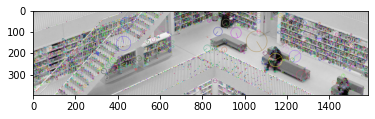

In [21]:
plt.imshow(image_kp, cmap='gray')

In [22]:
imageio.imsave("/home/niaki/Downloads/studgrad_bw_crop_kp_sift.jpg", image_kp)